# Homework 0
## Tianyu Yang
## Sept. 8

### Problem 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
hitters = pd.read_csv('Hitters.csv')
hitters.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [3]:
# select numeric features and drop misssing values
numerics= [i for i in hitters.columns if hitters.dtypes[i] != 'object']
num_hitters = hitters[numerics]
num_hitters = num_hitters[~num_hitters.Salary.isnull()]
num_hitters.isnull().any()

AtBat      False
Hits       False
HmRun      False
Runs       False
RBI        False
Walks      False
Years      False
CAtBat     False
CHits      False
CHmRun     False
CRuns      False
CRBI       False
CWalks     False
PutOuts    False
Assists    False
Errors     False
Salary     False
dtype: bool

In [4]:
X = num_hitters.drop('Salary', axis =1)
y = num_hitters['Salary']
#standardize the predictors to have 0 mean and variance 1
std =StandardScaler()
Xs = std.fit_transform(X)
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
alphas1 = np.logspace(0, 9, 100)
alphas2 = np.logspace(-1,6,100)
r_coefs, l_coefs = [],[]
for a1,a2 in zip(alphas1, alphas2):
    ridge.set_params(alpha = a1)
    lasso.set_params(alpha = a2)
    ridge.fit(Xs,y)
    lasso.fit(Xs,y)
    r_coefs.append(ridge.coef_)
    l_coefs.append(lasso.coef_)

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

(0.04466835921509635,
 2238721.1385683334,
 -449.0493203985626,
 552.2120221459671)

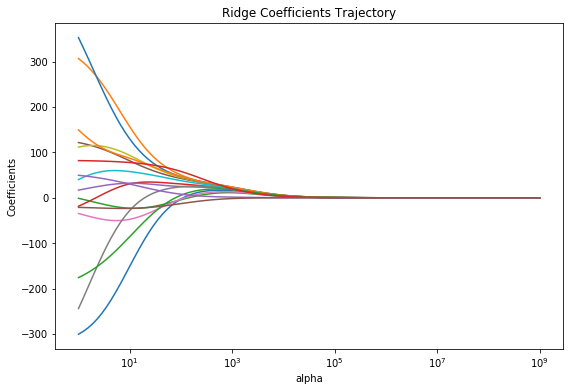

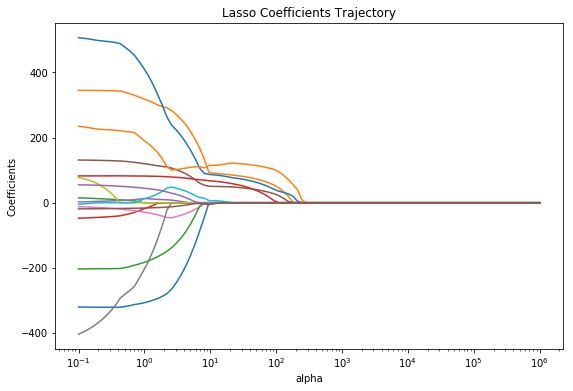

In [5]:
# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas1, r_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients Trajectory')
plt.axis('tight')

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas2, l_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients Trajectory')
plt.axis('tight')

In [6]:
# last three coefs left in lasso
for cs in l_coefs:
    if sum(cs != 0) ==3:
        print( X.columns[cs!=0])
        break

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


In [7]:
# find optimal penalty parameter by cross validation
r_params = {"alpha": np.logspace(0, 9, 100)}
l_params = {"alpha":np.logspace(-1,6,100)}
r_cv = GridSearchCV(ridge, r_params,cv = 5)
l_cv = GridSearchCV(lasso, l_params,cv = 5)
r_cv.fit(Xs,y)
l_cv.fit(Xs,y)

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyuyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1000000.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-01, 1.17681e-01, ..., 8.49753e+05, 1.00000e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
# best param for ridge regression
print(r_cv.best_params_)


{'alpha': 187.3817422860385}


In [9]:
ridge.set_params(alpha =187.3817422860385)
ridge.fit(Xs,y)
ridge.coef_

array([10.14056998, 39.3221191 ,  3.205964  , 27.88338583, 23.67330746,
       36.32069557,  6.39574667, 25.74680829, 37.33873815, 32.66542274,
       38.52935114, 38.91877237, 14.93869322, 47.64183365,  4.73243475,
       -8.5921636 ])

In [10]:
# best param for lasso regression
print(l_cv.best_params_)

{'alpha': 25.353644939701113}


In [11]:
# nonzero parameters in the best model
lasso.set_params(alpha = 25.353644939701113)
lasso.fit(Xs,y)
X.columns[lasso.coef_!=0]

Index(['Hits', 'Walks', 'CRuns', 'CRBI', 'PutOuts'], dtype='object')

#### 1.1
The last three predictors left in the lasso model are Hits, CRuns, CRBI. The best penalty parameter generated from cross validation is 25.35 and results in 5 nonzero coefficients.

#### 1.2
The optimal penalty value for ridge is 187.38. Although ridge does not result in sparsity, the coefficients are far from 0. 


### Problem 2

We assume that data are generated with an underlying pattern and random noise. A model not flexible enough to fit the underlying pattern is a biased model ie. using a straght line to fit a parabola. A model that changes drastically with respect to training data used has high variance ie. fitting to noise. Bias and variance together measure a model. The best model would have low bias and low variance. In cases where they cannot be achieved simulaneously, we could sacrifice some flexibility in the model. Therefore, we end up having model with a little more bias but much lower variance(restricting the model from fitting to the noises) and hence the trade-off. The regularization adds bias to the model but reduces the variance. In ridge and lasso models, a larger penalty parameter restricts more on the size of the coefficients, hence higher bias. In extreme case, $\alpha \rightarrow \infty$, all coefficients on predictors will be 0 or close to 0. On the contrary, 0 penalty parameter would just give the least square solution, a low bias model.
